In [ ]:
!unzip -q imagens_celulas_1000.zip

#EXEC

In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [ ]:
pasta = './imagens_celulas_1000/'


positivas = os.listdir(pasta + 'positivos/')

negativas = os.listdir(pasta + 'negativos/')


In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)


label =  0
imagem


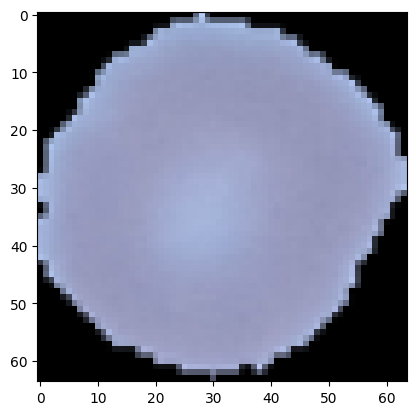

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-2])

print('imagem')
plt.imshow(dataset[-2])

In [ ]:
np.array(label)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(1600, 64, 64, 3)
(1600, 2)


In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)

conv4 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv4)
drop4 = tf.keras.layers.Dropout(rate = 0.2)(pool4)

flat = tf.keras.layers.Flatten()(drop4)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop5)
drop6  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation= 'softmax')(drop6)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,426 (4.90 MB)

 Trainable params: 1,283,426 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 50, validation_split = 0.2 )

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.5204 - loss: 0.6973 - val_accuracy: 0.6625 - val_loss: 0.6895
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5229 - loss: 0.6866 - val_accuracy: 0.6625 - val_loss: 0.6486
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6300 - loss: 0.6270 - val_accuracy: 0.6812 - val_loss: 0.6608
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7138 - loss: 0.5954 - val_accuracy: 0.7406 - val_loss: 0.5990
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7021 - loss: 0.5512 - val_accuracy: 0.7000 - val_loss: 0.6098
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7087 - loss: 0.5588 - val_accuracy: 0.6781 - val_loss: 0.6015
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7288 - loss: 0.5348 - val_accuracy: 0.7500 - val_loss: 0.5403
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7248 - loss: 0.5201 - val_accuracy: 0.7031 - v

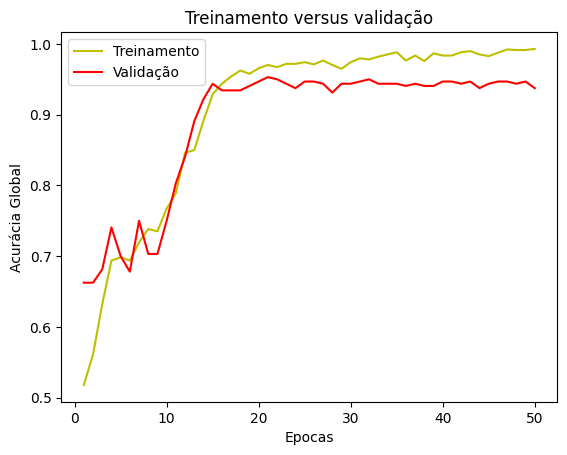

In [ ]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Acurácia Global")
plt.legend()
plt.show()

In [ ]:
model.save('malaria_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('malaria_model.h5')

In [ ]:
_,score = model.evaluate(X_test, y_test)

print(score)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9727 - loss: 0.1301
0.9700000286102295
